In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import nltk
from nltk.cluster import KMeansClusterer

### Cargamos los datos

In [12]:
word_vectors = np.load('../corpus_WiNER/word_vectors/wv_train_exp_decay_W_5.npz')
entity_vector = np.load('../corpus_WiNER/entity_vectors/ev_train_exp_decay_W_5.npz')
X_train = word_vectors['arr_0'][:100000]
y_train = entity_vector['arr_0'][:100000]
word_vectors = np.load('../corpus_WiNER/word_vectors/wv_dev_exp_decay_W_5.npz')
entity_vector = np.load('../corpus_WiNER/entity_vectors/ev_dev_exp_decay_W_5.npz')
X_dev = word_vectors['arr_0'][:20000]
y_dev = entity_vector['arr_0'][:20000]
word_vectors = np.load('../corpus_WiNER/word_vectors/wv_test_exp_decay_W_5.npz')
entity_vector = np.load('../corpus_WiNER/entity_vectors/ev_test_exp_decay_W_5.npz')
X_test = word_vectors['arr_0'][:20000]
y_test = entity_vector['arr_0'][:20000]

### Aplicamos PCA

In [25]:
# Reducir dimensionalidad y graficar
pca = PCA(n_components=2)
pca_ft = pca.fit_transform(X_dev)
pca_df = pd.DataFrame(data=pca_ft, columns=['PCA_1', 'PCA_2'])
pca_df = pd.concat([pca_df, pd.Series(y_dev, name='entityType')], axis=1)
pca_df.head()

,PCA_1,PCA_2,entityType
0,0.625045,-0.664455,PER
1,0.630601,-0.576076,PER
2,0.395954,-0.326312,PER
3,1.305846,-0.052780,O
4,0.894366,0.149724,ORG


### Graficamos

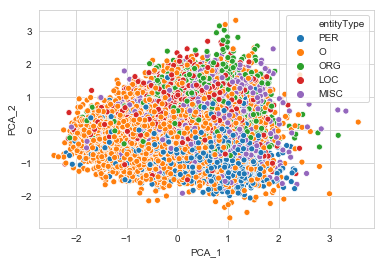

In [26]:
sns.set_style('whitegrid')
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue="entityType", data=pca_df)

### Apliquemos Clustering

Utilicemos KMeans de NLTK

In [27]:
NUM_CLUSTERS = 5 # PER - LOC - ORG - MISC - O
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(X_dev, assign_clusters=True)

/home/ekokic/env_thesis/lib/python3.6/site-packages/nltk/cluster/util.py:133: RuntimeWarning: invalid value encountered in double_scalars
  sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


In [28]:
for i in range(NUM_CLUSTERS):
    print ('El cluster %i tiene %i elementos' % (i, assigned_clusters.count(i)))
len(assigned_clusters)

El cluster 0 tiene 4752 elementos
El cluster 1 tiene 5797 elementos
El cluster 2 tiene 2954 elementos
El cluster 3 tiene 2129 elementos
El cluster 4 tiene 4368 elementos


20000

In [35]:
X_dev[]

array([[ 0.18685289,  0.05699002, -0.03977719, ...,  0.16708399,
         0.21308555,  0.09675066],
       [ 0.37162803, -0.20073955, -0.28137204, ...,  0.03668368,
         0.51861919,  0.13394062],
       [ 0.5214823 , -0.22907577, -0.23205306, ...,  0.01253922,
         0.41850292,  0.21611387],
       ...,
       [-0.36491455,  0.30045234,  0.06832374, ...,  0.04129426,
         0.21440214,  0.05949051],
       [-0.46060832,  0.3964525 ,  0.1471049 , ..., -0.1552208 ,
         0.08273973, -0.37537703],
       [-0.01910382,  0.48179781,  0.03674174, ..., -0.17740633,
         0.18363044, -0.31446067]])

In [44]:
words_df = {
        'word': X_dev.tolist(),
        'entityType': y_dev.tolist(),
        'cluster': assigned_clusters
}
words_df = pd.DataFrame(
        words_df,
        index=[assigned_clusters],
        columns = ['word', 'entityType']
)
print(words_df.loc[0].groupby('entityType').count())
print(words_df.loc[1].groupby('entityType').count())
print(words_df.loc[2].groupby('entityType').count())
print(words_df.loc[3].groupby('entityType').count())

            word
entityType      
LOC          301
MISC         492
O           3573
ORG          121
PER          265
            word
entityType      
LOC          680
MISC        1132
O           3109
ORG          361
PER          515
            word
entityType      
LOC          268
MISC         276
O            891
ORG           99
PER         1420
            word
entityType      
LOC           84
MISC         773
O            874
ORG          145
PER          253
